# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [7]:
#SOM example using wines data set
library(kohonen)

set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

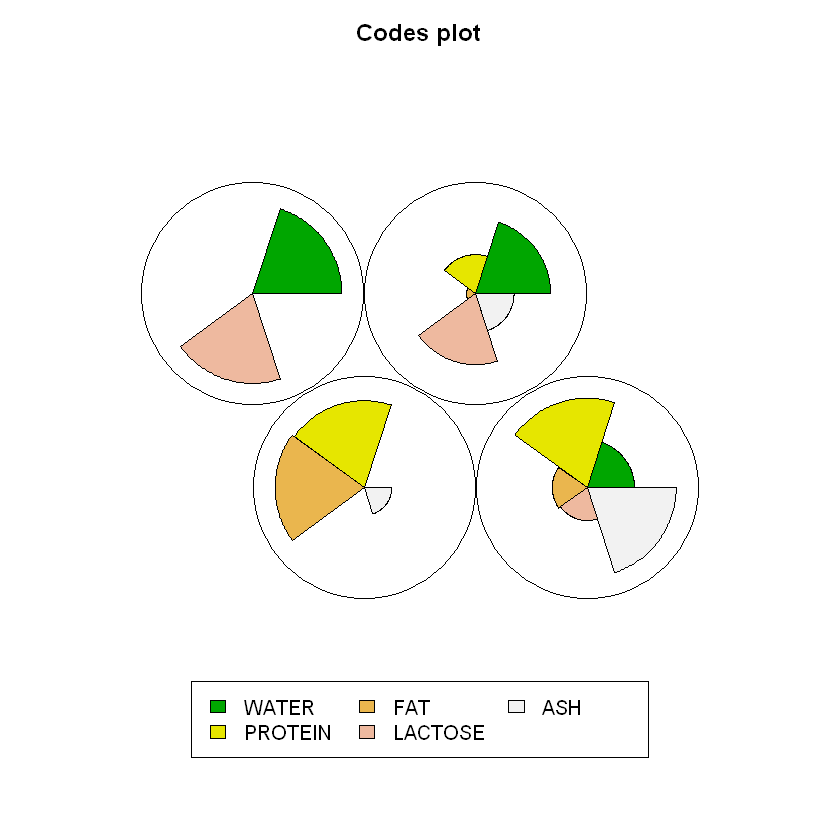

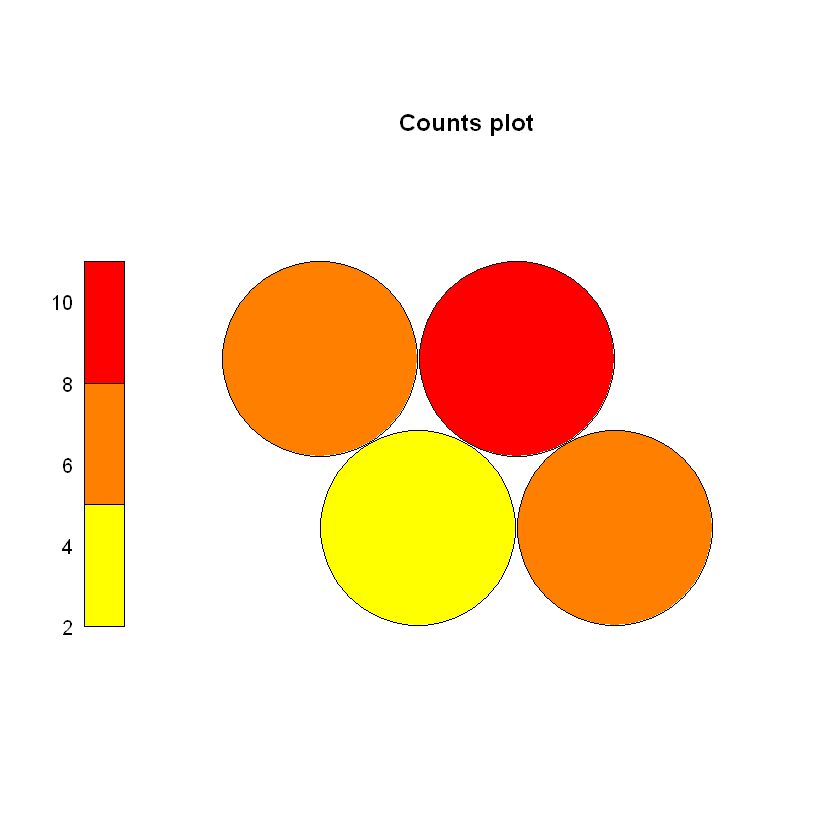

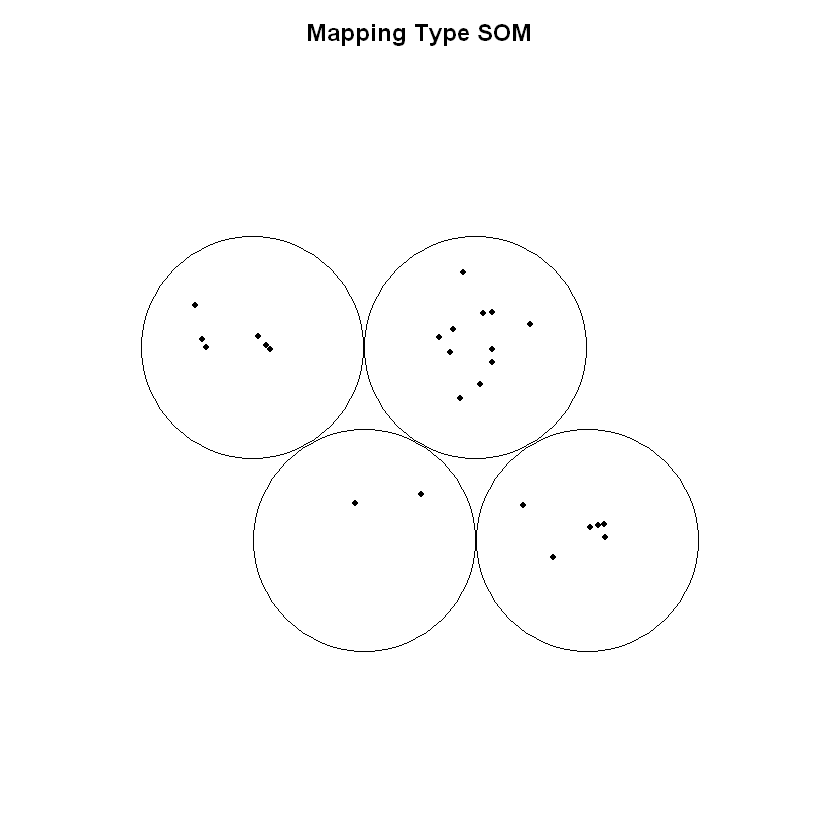

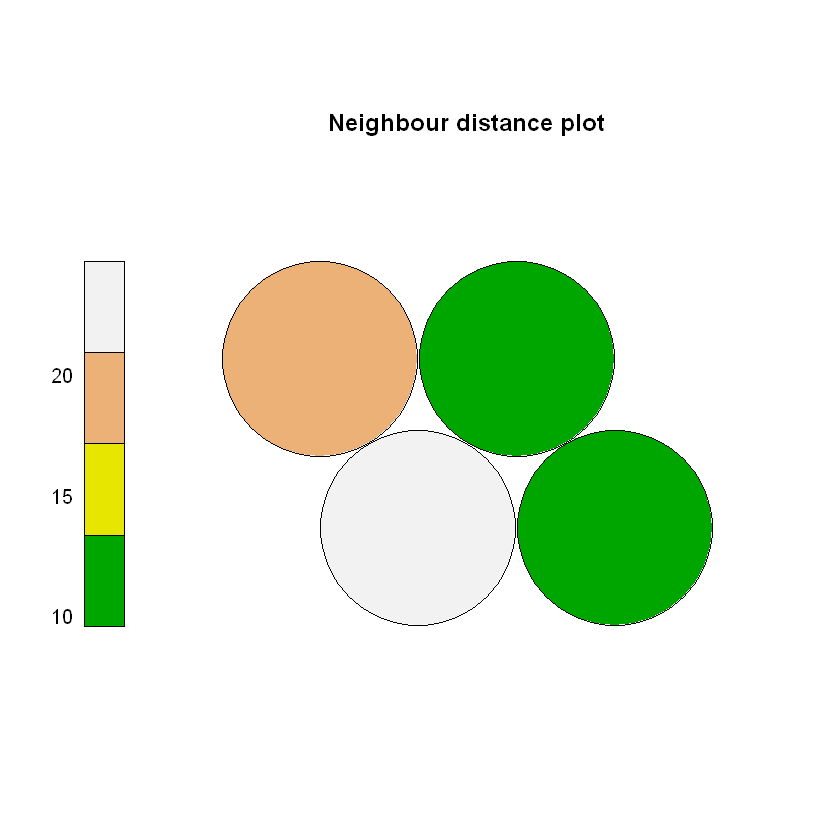

In [8]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

SOM: es un tipo de red neuronal donde las neuronas forman grupos y se mueven, doblan y giran en la cuadricula para que nuestro dataset se vea graficamente. el resultado puede llegar a indentificar grupos en dimenciones mas pequeñas, usualmente en 2D

Entrada: recibe un dataset, donde cada fila se transforma en un objeto que sirve para graficar los resultados. otros parametros como rlen es el numero de veces que el dataset se representa en la red. el radius, el cual es el numero que representa el radio en la vecindad.

Salida: graficos como los del ejemplo anterior.

Graficos: el primero muestra como las neuronas forman graficos a partir de iteraciones, el segundo es para ver dencidad de grupo, el tercero para ver los puntos o cantidad de datos por grupo. el ultimo es para ver la distancia entre grupos

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

si cambiamos somgri de hexagonal a rectanguar cambiaremos la asignacion de grupos a tipo cuadricula. si cambiamos los numeros, podremos crear mas grupos aunque el dataset solo tenga 5 componentes.



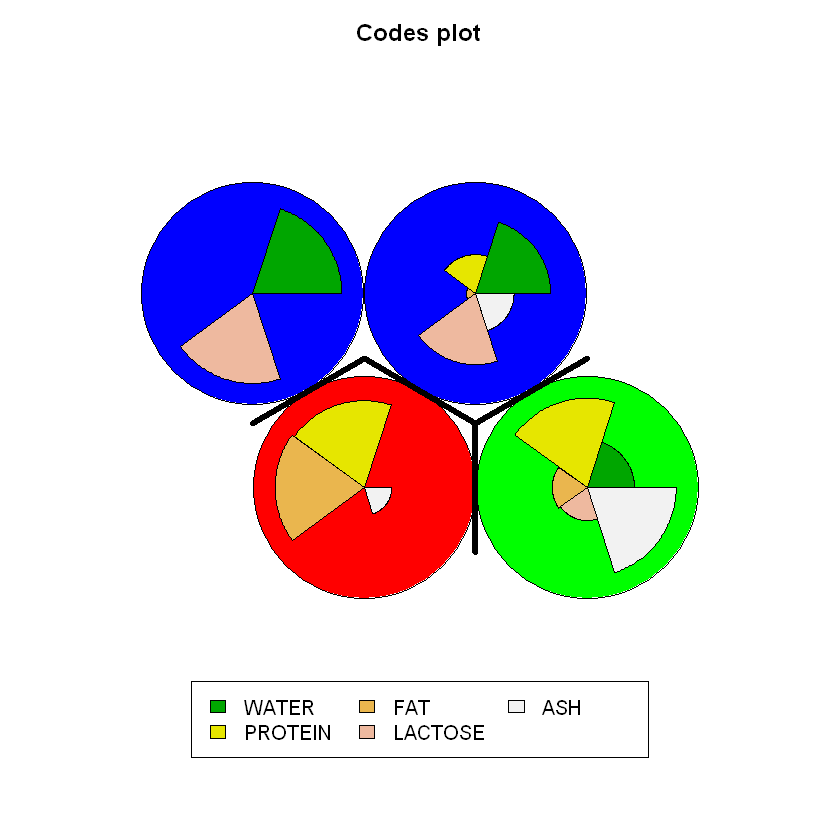

In [9]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.
La nueva visualización se genera a partir de las distancias entre los grupos para una agrupación gerarquica, luego se agrupan con el comando add.cluster.boundaries el cual genera lineas engras

b) Interprete y comente los resultados obtenidos. 
Es una forma de ocupar la salida del SOM y agrupar gerarquicamente para tener otro grafico con el cual hacer comparación.


Ejercicio 3: 
a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección
b) Realice las estimaciones y discuta sus resultados.

In [10]:
library(RCurl)
NBA <- read.csv(text = getURL("https://raw.githubusercontent.com/clarkdatalabs/soms/master/NBA_2016_player_stats_cleaned.csv"), 
    sep = ",", header = T, check.names = FALSE)
colnames(NBA)


ERROR: Error in function (type, msg, asError = TRUE) : error setting certificate verify locations:
  CAfile: C:/Users/Javier/AppData/Local/conda/conda/envs/rstudio/lib/R/library/RCurl/etc/ca-bundle.crt
  CApath: none


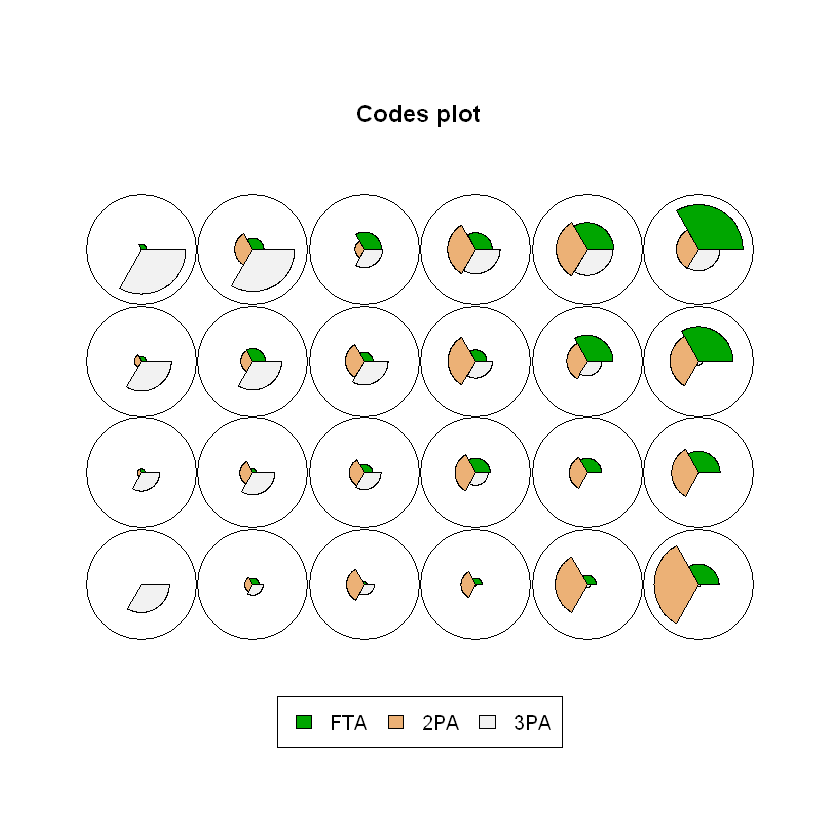

In [11]:
NBA.measures1 <- c("FTA", "2PA", "3PA")
NBA.SOM1 <- som(scale(NBA[NBA.measures1]), grid = somgrid(6, 4, "rectangular"))
plot(NBA.SOM1)

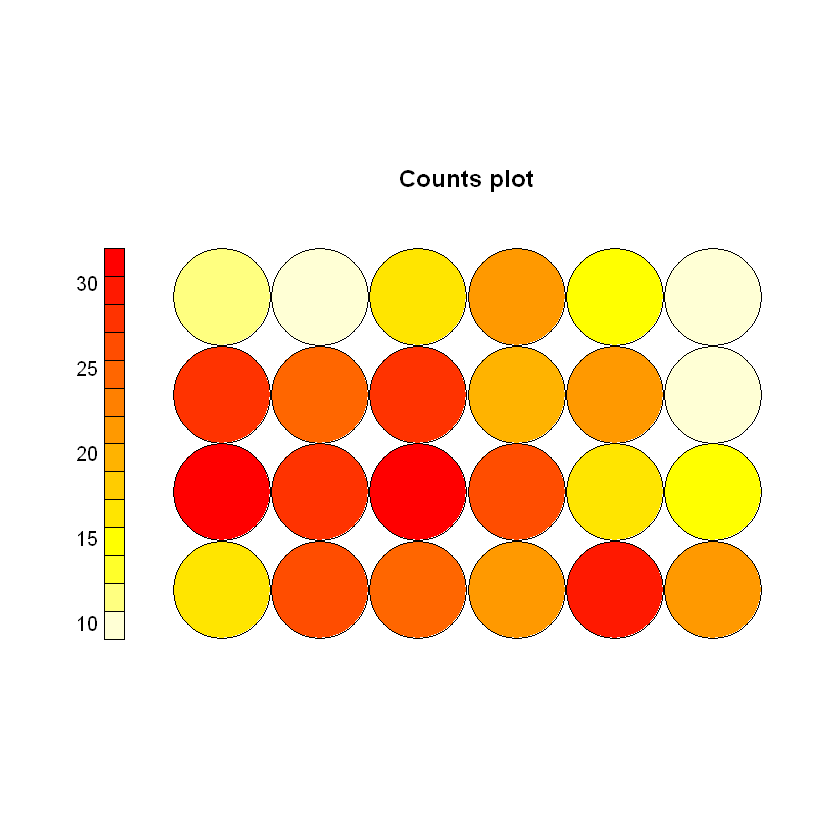

In [12]:
plot(NBA.SOM1, type = "counts", palette.name = colors, heatkey = TRUE)

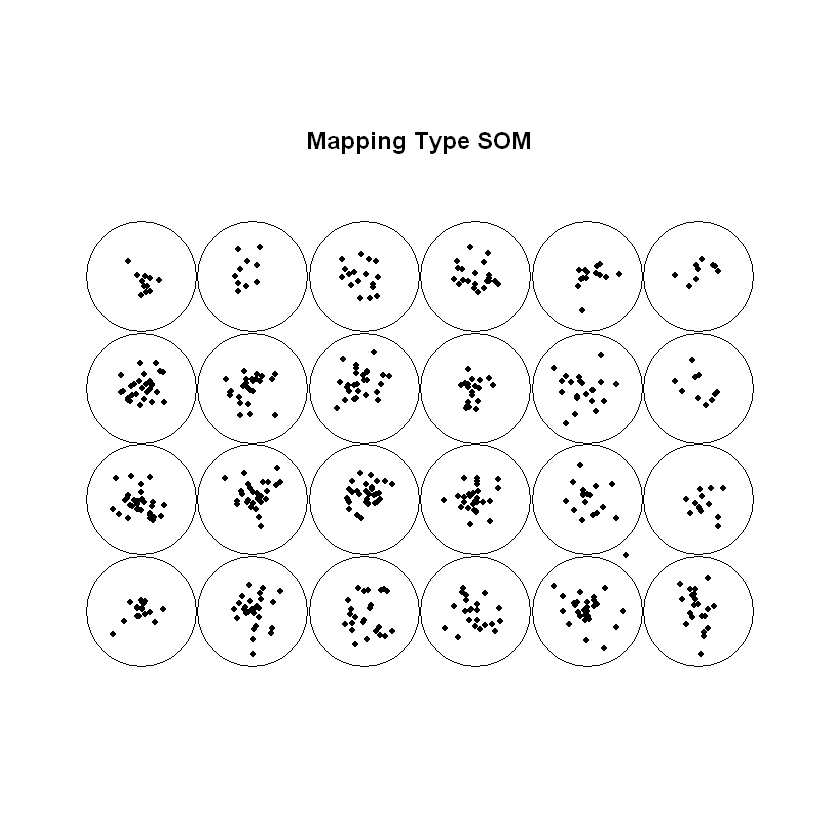

In [13]:
plot(NBA.SOM1, type = "mapping", pchs = 20, main = "Mapping Type SOM")

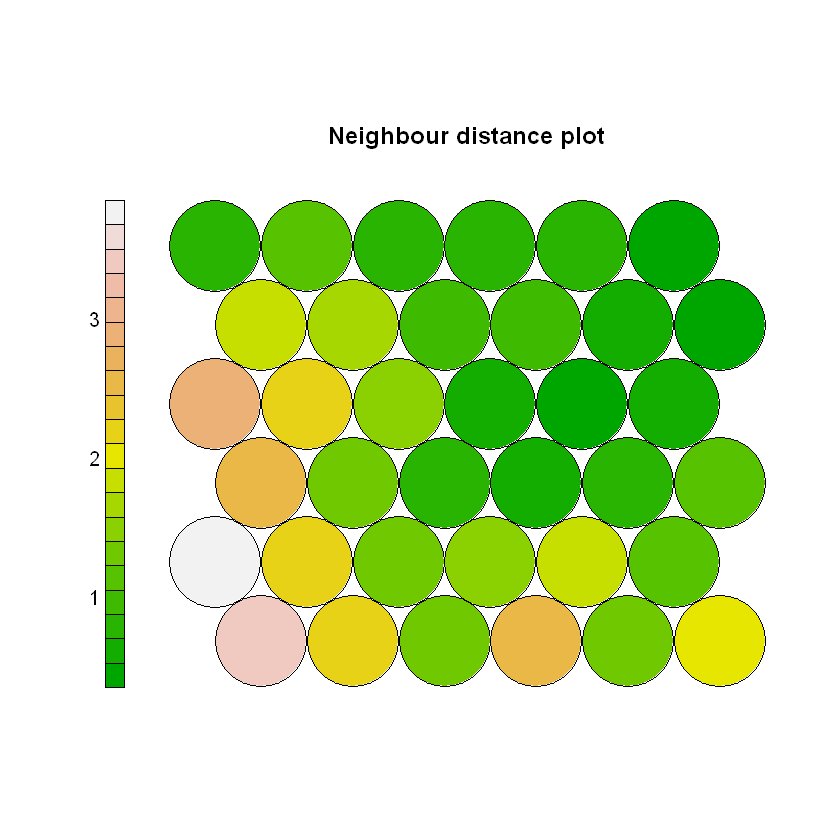

In [14]:
NBA.SOM2 <- som(scale(NBA[NBA.measures1]), grid = somgrid(6, 6, "hexagonal"))
plot(NBA.SOM2, type = "dist.neighbours", palette.name = terrain.colors)